<a href="https://colab.research.google.com/github/ShriShalini/Time-Series-Forecasting/blob/main/extreme_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install darts

  Using cached matplotlib-3.5.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
series_ai = pd.read_csv('ai_count_no_ouliers.csv')

In [2]:
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
scaler_ai_retweet = Scaler()

series_ai_count = scaler_ai_retweet.fit_transform(
        TimeSeries.from_dataframe(
            series_ai, 'date', ['count'])
    ) 
# series_ai_count.plot(label ='count')
# plt.xlabel('date')
# plt.ylabel('tweet_count')
# fig1 = plt.gcf()
# plt.legend();
# plt.show()
#fig1.savefig('tweet_count.png')



In [3]:
train_tweet_count, val_tweet_count = series_ai_count.split_after(pd.Timestamp('20200930'))

import torch

In [9]:
def extreme_true(pred,true):
  #define the hi_th anf lw_th
  hi_th = 0.65
  lw_th = 0.2
  if (pred>hi_th or pred <lw_th)  and (true <= hi_th and true >=lw_th):
    return True
  elif (true>hi_th or true <lw_th)  and (pred <= hi_th or pred >=lw_th):
    return True
  else:
    return False  
    



In [10]:
def ExtremeLoss(preds, true):
    extreme_tensor(preds,true)
"""     
   # define the upper and the lower thresholds
  loss = list(range(0,preds.shape[0]))
   # 1st loop for the batch
  batch_counter =0  
  for pred in preds:
    
     #pred is a tensor of 7 dimsneions 
     #2nd loop for dims in the tensor
     dim_counter = -1 
     for dim in pred :
       dim_counter +=1
       if extreme_true(dim,true[batch_counter][dim_counter] ) == True:
        # extreme loss
          loss[batch_counter] += (dim - true[batch_counter][dim_counter])*4
       else:
        #simple loss
          loss[batch_counter] += (dim - true[batch_counter][dim_counter]) 

     batch_counter +=1
  loss_tensor = torch.tensor(loss, requires_grad= True)
  #print(loss_tensor) 
  return torch.sum(loss_tensor)
"""

'     \n   # define the upper and the lower thresholds\n  loss = list(range(0,preds.shape[0]))\n   # 1st loop for the batch\n  batch_counter =0  \n  for pred in preds:\n    \n     #pred is a tensor of 7 dimsneions \n     #2nd loop for dims in the tensor\n     dim_counter = -1 \n     for dim in pred :\n       dim_counter +=1\n       if extreme_true(dim,true[batch_counter][dim_counter] ) == True:\n        # extreme loss\n          loss[batch_counter] += (dim - true[batch_counter][dim_counter])*4\n       else:\n        #simple loss\n          loss[batch_counter] += (dim - true[batch_counter][dim_counter]) \n\n     batch_counter +=1\n  loss_tensor = torch.tensor(loss, requires_grad= True)\n  #print(loss_tensor) \n  return torch.sum(loss_tensor)\n'

In [4]:
a = [0.0]
def initialize_a(a):
  a = [0.0]
  return a

In [11]:
def try_loss(pred, true):
  global a
  #a = initialize_a(a)
  import numpy as np
  #print("print",len(pred_tensor), len(pred_tensor[0]), len(true_tensor))
  h = 0.8
  l = 0.2

  loss = torch.tensor(0.0, requires_grad=True)

  #torch.cat((A,B))
  l = 0
  for i in range(0,len(pred)):
    for j in range(0,len(pred[0])):
      if((true[i][j]>h or true[i][j]<l) and (pred[i][j] <= h and pred[i][j] >= l)):
        #temp = torch.tensor(0.0, requires_grad=True)
        temp = torch.abs(torch.tensor(10000*(true[i][j]-pred[i][j])).clone().detach().requires_grad_(True))
        # loss = torch.unsqueeze(loss, 0)
        #temp = torch.unsqueeze(temp, 0)
        #print('ll',loss,temp)
        np_arr = temp.cpu().detach().numpy().tolist()[0]
        #loss = torch.stack((temp,loss))
        a.append(np_arr)
        #print(a,len(a))
        #print(sum(a))
        #loss =  torch.add(loss,temp)
      else:
        temp = torch.abs(torch.tensor(true[i][j]-pred[i][j]).clone().detach().requires_grad_(True))
        np_arr = temp.cpu().detach().numpy().tolist()[0]
        #loss = torch.stack((temp,loss))
        a.append(np_arr)
        
        #print('l',loss)
  #loss = torch.subtract(pred_tensor,true_tensor)
  #l = torch.mean(loss)
  #l = l.clone().detach().requires_grad_(True)
  #print(l)
  #print("sum",sum(a))
  loss = torch.tensor(sum(a)/len(a), requires_grad=True)
  #print("sdf",loss)
  return torch.mean(loss)

In [19]:
def extreme_tensor(pred_tensor,true_tensor):
    hi_th = 0.65
    lw_th = 0.2
#    high_tensor = torch.full((pred_tensor.size[0],pred_tensor.size[1],pred_tensor.size[2]), hi_th)
#    lw_tensor = torch.full((pred_tensor.size[0],pred_tensor.size[1],pred_tensor.size[2]), lw_th)

    high_tensor = torch.full((pred_tensor.shape[0],pred_tensor.shape[1],pred_tensor.shape[2]), hi_th)
    lw_tensor = torch.full((pred_tensor.shape[0],pred_tensor.shape[1],pred_tensor.shape[2]), lw_th)
#compare the pred with the high and low_tensor
    pred_comp_hi = torch.gt(pred_tensor,high_tensor)
    pred_comp_lw = torch.le(pred_tensor,lw_tensor)

# an or to know if it is extreme or not  
    extreme_pred = torch.logical_or(pred_comp_hi,pred_comp_lw)
#compare the true with the high and low
    true_comp_hi = torch.le(true_tensor,high_tensor)
    true_comp_lw = torch.gt(true_tensor,lw_tensor)

# an and to know if it is extreme or not
    extreme_true = torch.logical_and(true_comp_hi,true_comp_lw)
#get the and of the 2 above

    extreme_final = torch.logical_and(extreme_pred,extreme_true)

  #get the diff from the pred and true
    true_comp_hi_2 = torch.gt(true_tensor,high_tensor)
    true_comp_lw_2 = torch.le(true_tensor,lw_tensor)
    
    true_or = torch.logical_or(true_comp_hi_2,true_comp_lw_2)
    
    pred_comp_hi_2 = torch.le(pred_tensor,high_tensor)
    pred_comp_lw_2 = torch.gt(pred_tensor,lw_tensor)
    
    pred_or = torch.logical_or(pred_comp_hi_2,pred_comp_lw_2)
    # an and to know if it is extreme or not
    extreme_final_2 = torch.logical_and(true_or,pred_or)
    
  # change the values of the true and false to the hyperparamters of the loss

    boolean_tensor = torch.logical_or(extreme_final,extreme_final_2)
    int_tensor = boolean_tensor.long()
    
  # change the boolean tensor with values
    x = torch.where(int_tensor==1,int_tensor, 5)
    x = x.double()
    final_tensor = torch.where(x==0, x ,0.2)

# element-wise subtraction
    loss_tensor = torch.subtract(pred_tensor,true_tensor)

#element-wise mul of loss with 
    product = torch.mul(loss_tensor, final_tensor)
    product = torch.tensor(product, requires_grad=True)
    #print(product.shape)
    #print((-torch.sum(product)))
    
    return(torch.sum(product))

In [7]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [12]:
model_ai = NBEATSModel(input_chunk_length=60, output_chunk_length=7, n_epochs=30, random_state=0,
                                          loss_fn = try_loss,  )
model_ai.fit([train_tweet_count],val_series = [val_tweet_count], verbose=True)
pred_ai = model_ai.predict(n=88, series = train_tweet_count )
#pred_follower = model_ai_multiple.predict(n=36, series = train_follower )
error_tweet = mape(val_tweet_count[:88],pred_ai)
#error_follower = mape(val_follower[:36],pred_follower)
print("this is the error for the tweet_count:",error_tweet )

[2021-11-30 16:50:08,235] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-11-30 16:50:08,235] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-11-30 16:50:08,346] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-11-30 16:50:08,346] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourc

 37%|███▋      | 11/30 [00:04<00:07,  2.40it/s]

 70%|███████   | 21/30 [00:08<00:03,  2.41it/s]

100%|██████████| 30/30 [00:12<00:00,  2.50it/s]


this is the error for the tweet_count: 629.2356661820182


this is the error for the tweet_count: 562.7334995732118
MAPE = 562.73%


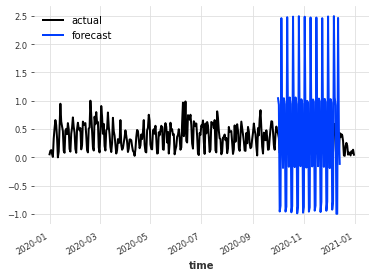

In [9]:
pred_ai = model_ai.predict(n=75, series = train_tweet_count )
#pred_follower = model_ai_multiple.predict(n=36, series = train_follower )
error_tweet = mape(val_tweet_count[:75],pred_ai)
#error_follower = mape(val_follower[:36],pred_follower)
print("this is the error for the tweet_count:",error_tweet )
series_ai_count.plot(label='actual')
#val_retweet.plot(label= 'validation')
plt.rcParams['figure.figsize'] = [10, 8]
pred_ai.plot(label='forecast')
fig1 = plt.gcf()
plt.legend();
#fig1.savefig('forecast_75_days.png')
print('MAPE = {:.2f}%'.format(mape(series_ai_count, pred_ai)))

In [225]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.0
Uninstalling matplotlib-3.5.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.0-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/uninstall.py", line 8